# Movie Analysis: Exploratory Data Analysis

## About:
This notebook contains the process used for exploring the data, which in turn should provide insights into the following questions:

1. What genre or genres will be most succesful
2. Which stars to hire
3. Which director to hire 
4. Best time of year to release the film
5. The content that should be in the film

In [1]:
# import notebook dependencies:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
%matplotlib inline

## 1. Which genres generate the most revenue:
Genres are a great way to focus on making a profitable film. Most films are given more than one genre, so we will analyze the genres in two different ways; as a group, and as single elements.

### a. Which genre groups generate the most revenue:

Bringing in the pre-processed data set:

In [2]:
main_df_path = os.path.join(os.pardir, 'data', 'processed', 'combined.csv')
main_df = pd.read_csv(main_df_path)

Making sure it looks like it should:

In [3]:
main_df.head(3)

,imdb_id,title,year,director,production_co,rank,budget_usd,us_gross,revenue,popular,genres,date
0,tt2488496,Star Wars: Episode VII - The Force Awakens,2015,J.J. Abrams,Lucasfilm,519,245000000.0,937000000.0,692000000.0,True,"Action,Adventure,Sci-Fi",2015-12-15
1,tt4154796,Avengers: Endgame,2019,Anthony Russo,Marvel Studios,111,356000000.0,858000000.0,502000000.0,True,"Action,Adventure,Drama",2019-04-24
2,tt0499549,Avatar,2009,James Cameron,Twentieth Century Fox,533,237000000.0,761000000.0,524000000.0,True,"Action,Adventure,Fantasy",2009-12-10


Sort values by revenue:

In [4]:
main_df = main_df.sort_values('revenue', ascending=False)

In [5]:
main_df.head(3)

,imdb_id,title,year,director,production_co,rank,budget_usd,us_gross,revenue,popular,genres,date
0,tt2488496,Star Wars: Episode VII - The Force Awakens,2015,J.J. Abrams,Lucasfilm,519,245000000.0,937000000.0,692000000.0,True,"Action,Adventure,Sci-Fi",2015-12-15
2,tt0499549,Avatar,2009,James Cameron,Twentieth Century Fox,533,237000000.0,761000000.0,524000000.0,True,"Action,Adventure,Fantasy",2009-12-10
6,tt0369610,Jurassic World,2015,Colin Trevorrow,Universal Pictures,1115,150000000.0,652000000.0,502000000.0,True,"Action,Adventure,Sci-Fi",2015-06-06


Graphing the genres for the entire dataset to visualize the total distribution:

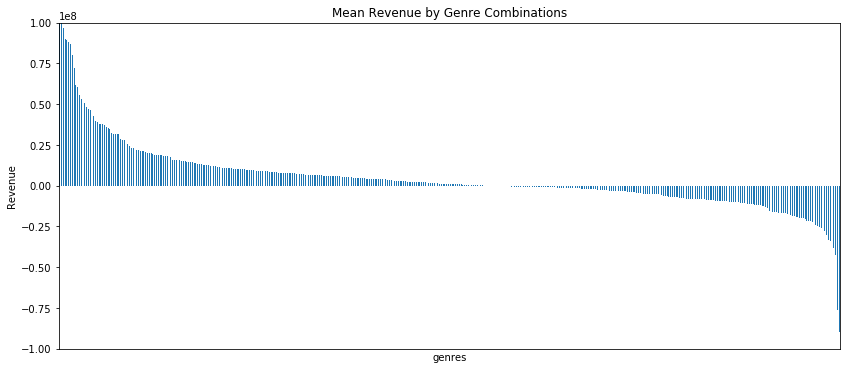

In [6]:
plt.figure(figsize=(14, 6))
main_df.groupby('genres')['revenue'].mean().sort_values(ascending=False).plot.bar()
plt.ylim(-1e8, 1e8)
plt.title('Mean Revenue by Genre Combinations')
plt.ylabel('Revenue')
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False)

There is a huge spread for the genres.

Now focusing on the top 20 genre combinations:

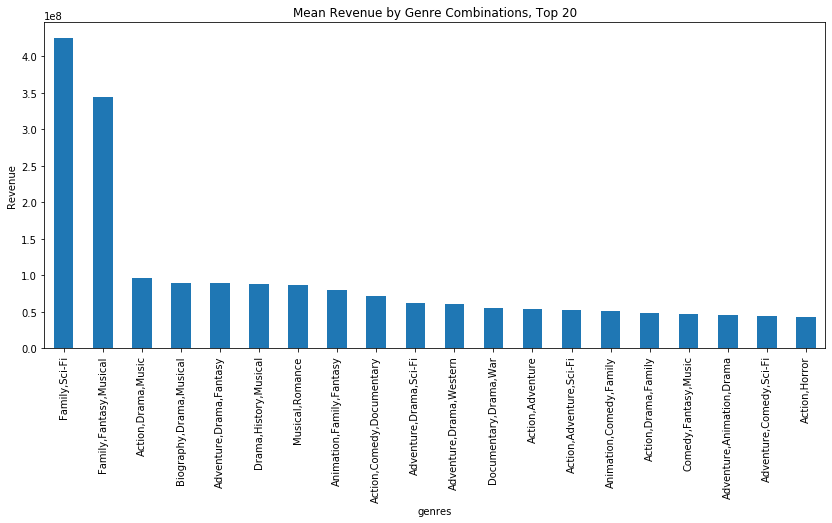

In [7]:
plt.figure(figsize=(14, 6))
main_df.groupby('genres')['revenue'].mean().sort_values(ascending=False).head(20).plot.bar()
plt.title('Mean Revenue by Genre Combinations, Top 20')
plt.ylabel('Revenue');

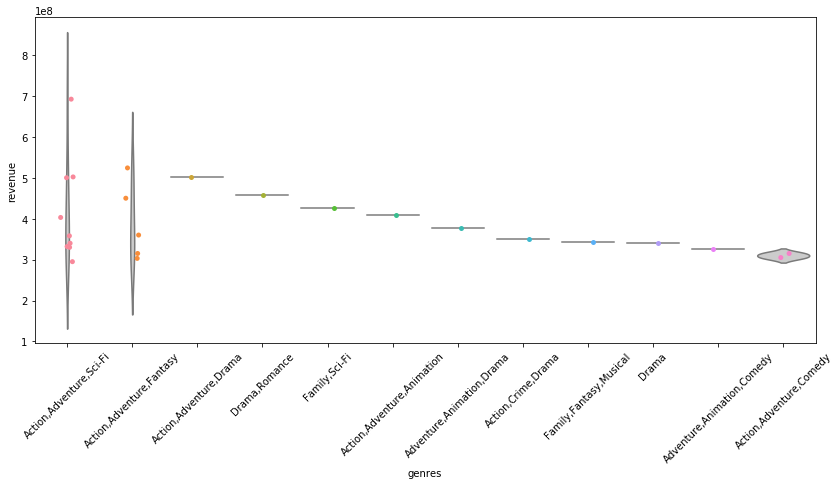

In [10]:
fig = plt.figure(figsize=(14, 6))

data = main_df[['genres', 'revenue']].sort_values('revenue', ascending=False).head(25)
ax = sns.violinplot(x="genres", y="revenue", data=data,
                    inner=None, color=".8")
ax = sns.stripplot(x="genres", y="revenue", data=data)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45);

Looks like 'Family,Sci-Fi' and 'Family,Fantasy,Musical' are disproportionately large. Let me inspect those specific genres:

In [11]:
main_df[main_df['genres'] == 'Family,Sci-Fi']

,imdb_id,title,year,director,production_co,rank,budget_usd,us_gross,revenue,popular,genres,date
22,tt0083866,E.T. the Extra-Terrestrial,1982,Steven Spielberg,Universal Pictures,1260,10000000.0,435000000.0,425000000.0,True,"Family,Sci-Fi",1982-06-11


In [12]:
main_df[main_df['genres'] == 'Action,Drama,Music']

,imdb_id,title,year,director,production_co,rank,budget_usd,us_gross,revenue,popular,genres,date
538,tt0103855,The Bodyguard,1992,Mick Jackson,Kasdan Pictures,4113,25000000.0,122000000.0,97000000.0,False,"Action,Drama,Music",1992-11-25


Well, they are both legitimate rows with accurate values. The reason they are on top is because they are each in their own category and they do not have other less succesful titles bringing down the mean.

Perhaps we will have better luck with splitting up the genres.

### b. Which individual genres make the most profit:

Let me explode the dataframe so each genre is on its own row:

In [13]:
main_df['genres'] = main_df['genres'].str.split(',')

In [14]:
exploded_main_df = main_df.explode('genres')

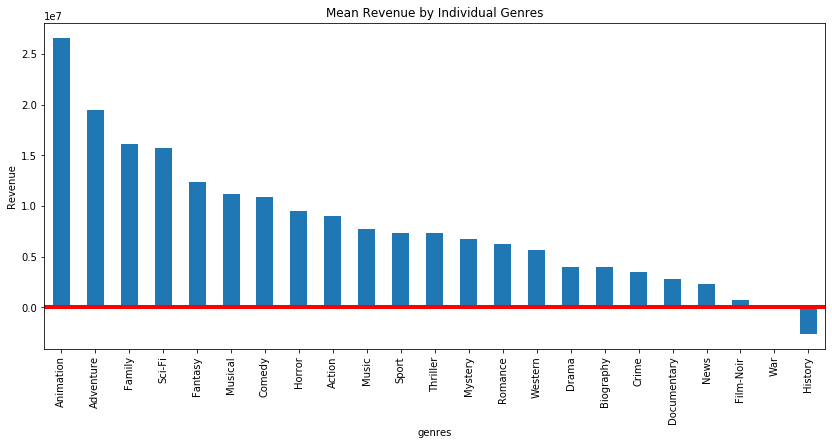

In [15]:
plt.figure(figsize=(14, 6))
exploded_main_df.groupby('genres')['revenue'].mean().sort_values(ascending=False).plot.bar()
plt.title('Mean Revenue by Individual Genres')
plt.ylabel('Revenue')
plt.axhline(linewidth=4, color='r');

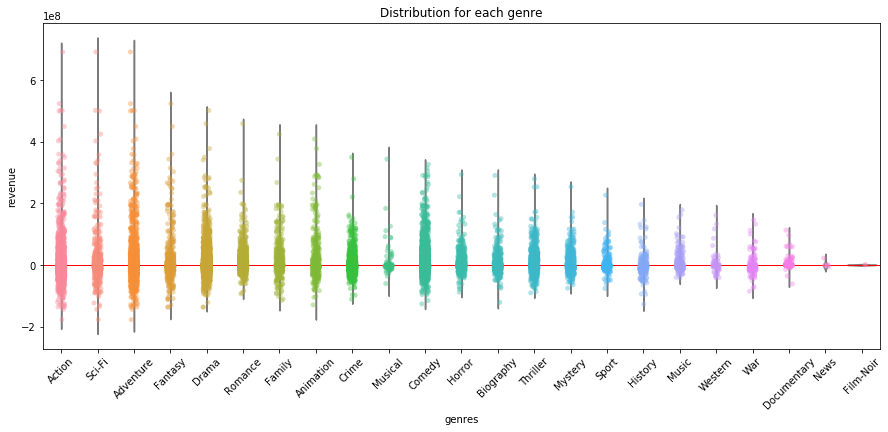

In [16]:
fig = plt.figure(figsize=(15, 6))

data = exploded_main_df[['genres', 'revenue']].sort_values('revenue', ascending=False)
ax = sns.violinplot(x="genres", y="revenue", data=data,
                    inner=None, color=".8")
ax = sns.stripplot(x="genres", y="revenue", data=data, alpha=.4)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
plt.axhline(linewidth=1, color='r')
plt.title('Distribution for each genre');

### Deeper look:

This looks like a more even distribution than it did when using genre groups instead.

Let's check out some of the top genres to make sure they are correct:

In [17]:
# columns and statistics to view:
numeric_columns = ['year', 'budget_usd', 'us_gross', 'revenue']
aggregates = ['count', 'mean', 'std', 'median']

In [18]:
# explore statistical values:
exploded_main_df[exploded_main_df['genres'] == 'Animation'][numeric_columns].agg(aggregates)

,year,budget_usd,us_gross,revenue
count,358.000000,3.580000e+02,3.580000e+02,3.580000e+02
mean,2004.687151,6.252854e+07,8.912995e+07,2.660141e+07
std,13.171670,5.515029e+07,1.037749e+08,7.751831e+07
median,2008.000000,5.000000e+07,5.250000e+07,1.000000e+06


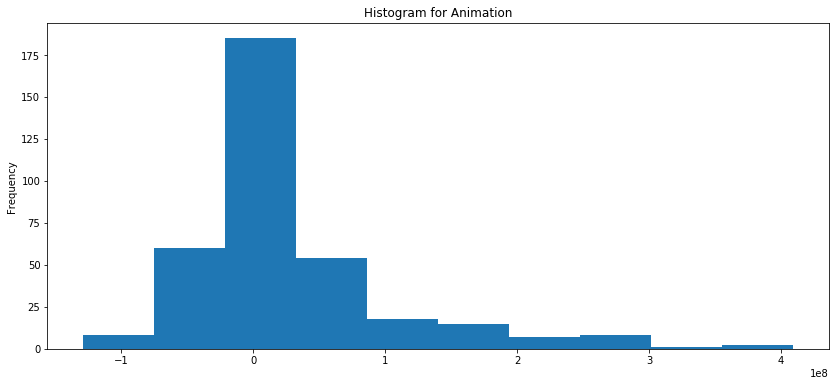

In [19]:
# distribution:
exploded_main_df[exploded_main_df['genres'] == 'Animation']['revenue'].plot.hist(title="Histogram for Animation", figsize=(14, 6));

In [20]:
exploded_main_df[exploded_main_df['genres'] == 'Animation']

,imdb_id,title,year,director,production_co,rank,budget_usd,us_gross,revenue,popular,genres,date
9,tt3606756,Incredibles 2,2018,Brad Bird,Walt Disney Pictures,1282,2.000000e+08,609000000.0,4.090000e+08,True,Animation,2018-06-14
10,tt6105098,The Lion King,2019,Jon Favreau,Fairview Entertainment,114,2.600000e+08,544000000.0,2.840000e+08,True,Animation,2019-07-12
15,tt2277860,Finding Dory,2016,Andrew Stanton,Pixar Animation Studios,2562,2.000000e+08,486000000.0,2.860000e+08,True,Animation,2016-06-16
16,tt4520988,Frozen II,2019,Chris Buck,Walt Disney Animation Studios,82,1.500000e+08,477000000.0,3.270000e+08,True,Animation,2019-11-20
21,tt0298148,Shrek 2,2004,Andrew Adamson,DreamWorks,2812,1.500000e+08,441000000.0,2.910000e+08,False,Animation,2004-05-19
...,...,...,...,...,...,...,...,...,...,...,...,...
7479,tt0792978,Mia and the Migoo,2008,Jacques-Rémy Girerd,Folimage,142144,8.999357e+06,17000.0,-8.982357e+06,False,Animation,2008-09-06
7755,tt3148834,Thunder and the House of Magic,2013,Jeremy Degruson,nWave Pictures,27216,3.400000e+07,4000.0,-3.399600e+07,False,Animation,2013-12-24
7756,tt1748199,Silver Circle,2013,Pasha Roberts,Lineplot Productions,314115,1.600000e+06,4000.0,-1.596000e+06,False,Animation,2013-03-22
7760,tt1621766,Approved for Adoption,2012,Laurent Boileau,2 Minutes Animation,178006,3.964003e+06,4000.0,-3.960003e+06,False,Animation,2012-06-06


In [21]:
# explore statistical values:
exploded_main_df[exploded_main_df['genres'] == 'History'][numeric_columns].agg(aggregates)

,year,budget_usd,us_gross,revenue
count,277.000000,2.770000e+02,2.770000e+02,2.770000e+02
mean,2004.277978,2.567011e+07,2.300425e+07,-2.665868e+06
std,13.326393,2.976278e+07,3.816086e+07,3.292138e+07
median,2007.000000,1.600000e+07,5.700000e+06,-4.862490e+06


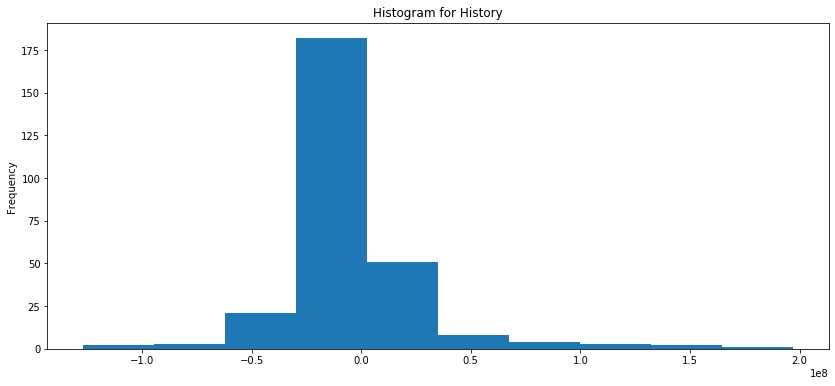

In [22]:
# distribution:
exploded_main_df[exploded_main_df['genres'] == 'History']['revenue'].plot.hist(title="Histogram for History", figsize=(14, 6));

After analyzing the two genres, it looks like they have similar distributions (slightly skewed) and no weird outiers. From that I conclude that the results are in fact legitimate, and that no sane person would make a history movie for profit.

## 2. Which actors and actresses play in high revenue films:

## 3. Which director has the highest total revenue from films:

## 4. What is the best month to release a movie:

In [23]:
main_df['date'] = pd.to_datetime(main_df['date'], infer_datetime_format=True)

In [24]:
main_df['month'] = main_df['date'].apply(lambda x: x.month_name())

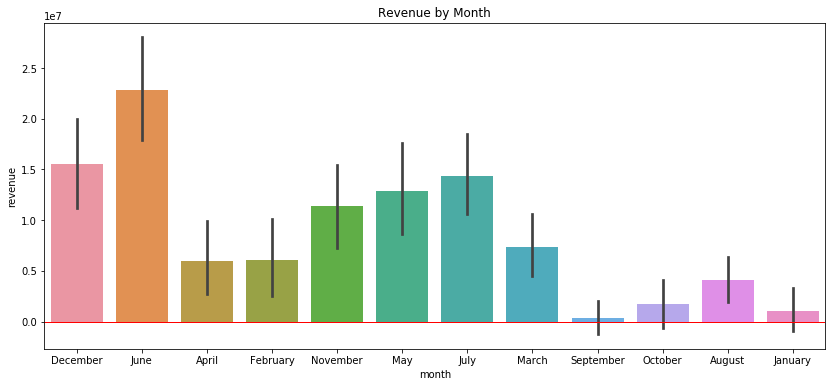

In [25]:
plt.figure(figsize=(14, 6))
# main_df.groupby('month')['revenue'].mean().sort_values(ascending=False).plot.barh()
data = main_df[['month', 'revenue']].sort_values('revenue', ascending=False)

sns.barplot(x="month", y="revenue", data=data,
            label="Mean")
plt.title("Revenue by Month")
plt.axhline(linewidth=1, color='r');

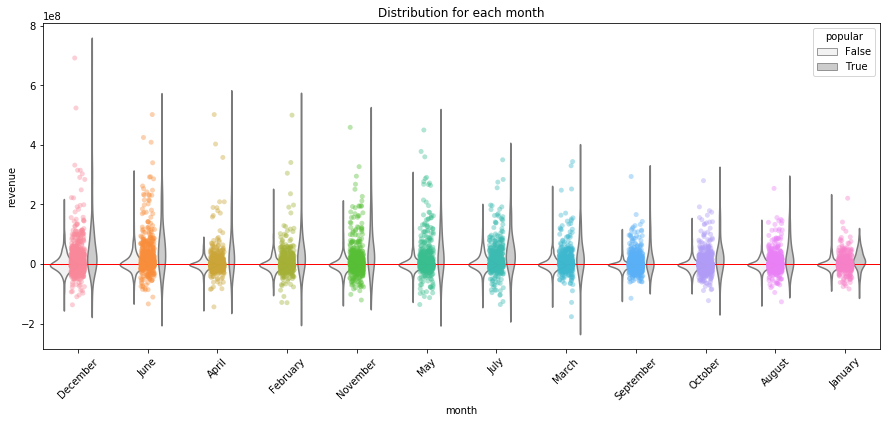

In [27]:
fig = plt.figure(figsize=(15, 6))
data = main_df[['month', 'revenue', 'popular']].sort_values('revenue', ascending=False)
ax = sns.violinplot(x="month", y="revenue", hue="popular", data=data,
                    inner=None, color=".8", split=False)
ax = sns.stripplot(x="month", y="revenue", data=data, alpha=.4)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
plt.axhline(linewidth=1, color='r')
plt.title('Distribution for each month');

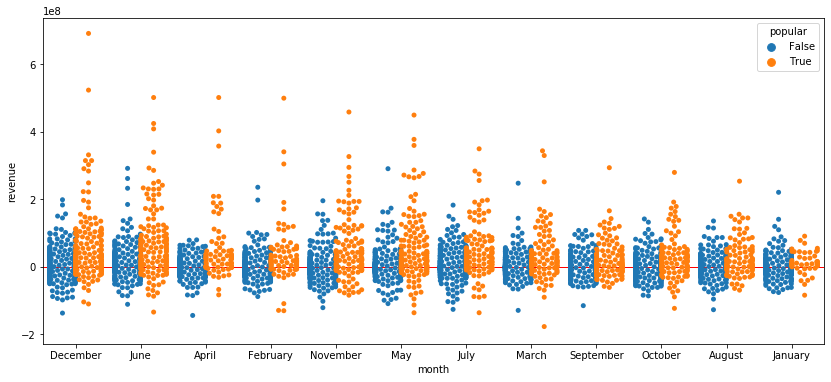

In [30]:
plt.figure(figsize=(14,6))
sns.swarmplot(x="month", y="revenue", hue="popular", data=data, dodge=True)
plt.axhline(linewidth=1, color='r');

## 5. What content appears most often in high revenue titles:

In [31]:
# bring in keywords:
keywords_df_path = os.path.join(os.pardir, 'data', 'processed', 'keywords.csv')
keywords_df = pd.read_csv(keywords_df_path)

In [32]:
keywords_df = main_df.set_index('imdb_id').join(keywords_df.set_index('imdb_id')).reset_index()

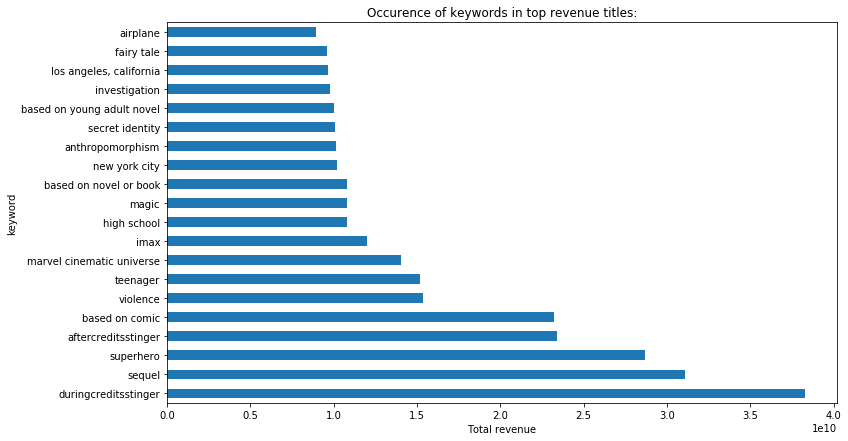

In [33]:
plt.figure(figsize=(12, 7))
keywords_df.groupby('keyword')['revenue'].sum().sort_values(ascending=False).head(20).plot.barh()
plt.xlabel('Total revenue')
plt.title('Occurence of keywords in top revenue titles:');

In [34]:
main_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7865 entries, 0 to 1093
Data columns (total 13 columns):
imdb_id          7865 non-null object
title            7865 non-null object
year             7865 non-null int64
director         7865 non-null object
production_co    7865 non-null object
rank             7865 non-null int64
budget_usd       7865 non-null float64
us_gross         7865 non-null float64
revenue          7865 non-null float64
popular          7865 non-null bool
genres           7865 non-null object
date             7865 non-null datetime64[ns]
month            7865 non-null object
dtypes: bool(1), datetime64[ns](1), float64(3), int64(2), object(6)
memory usage: 1.1+ MB


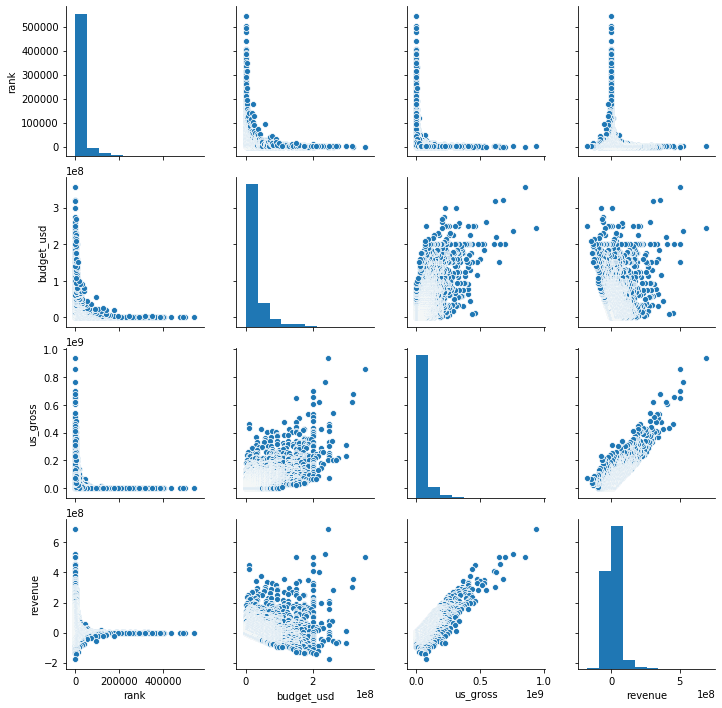

In [35]:
sns.pairplot(main_df[['rank', 'budget_usd', 'us_gross', 'revenue']]);

## Conclusion: